In [13]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [14]:
import os, shutil
name = "24_11_7_image_A"
save_dir = "../../../2D/.saves/" + name
if not os.path.exists(save_dir+"0/"):
    os.makedirs(save_dir+"0/")
    os.makedirs(save_dir+"1/")
    os.makedirs(save_dir+"2/")

In [15]:
from PIL import Image
N = int(2**10)
Npixels = N
dx = 0.1
img = Image.open('../../../2D/.images/io.png')
img = img.resize((Npixels,Npixels))
img_arr = np.array(img)/255*2-1 # Values between -1 and +1
imgR = img_arr[:,:,0]
imgG = img_arr[:,:,1]
imgB = img_arr[:,:,2]
print(np.shape(imgR))

(1024, 1024)


In [16]:
x = 0
y = 0
for c in np.array([0,1,2]): #0:R; 1:G; 2:B
    f = open(save_dir +str(c)+"/state.dat","w")
    f.write(str(N)+" 0 "+str(dx)+"\n")
    for i in np.arange(0,N):
        y = 0
        for j in np.arange(0,N):
            f.write(str(y)+" "+str(x)+" "+str(img_arr[i,j,c])+"\n")
            y = round(y + dx, 3)
        x = round(x + dx,3)
    f.close()

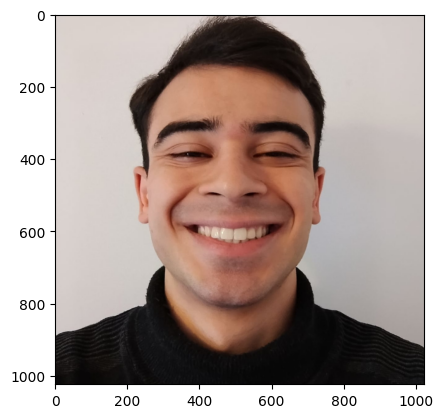

In [17]:
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


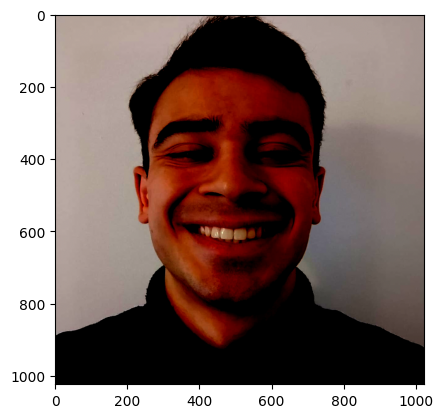

In [18]:
# READ

img_t = np.zeros((N,N,3))
for c in np.array([0,1,2]): #0:R; 1:G; 2:B
    f = open(save_dir + str(c) + "/state.dat","r")
    i = 0
    j = 0
    params = 0
    for row in f:
        if params == 0:
            N, t, dx = row.split(" ")
            N = int(N)
            params = 1
        else:
            x, y, var = row.split(" ")
            img_t[i,j,c] = float(var)
            
            j = j + 1
            if j >= N:
                i = i + 1
                j = 0
    f.close()

plt.imshow(img_t)